In [126]:
#install neccessary packages
!pip install wfdb 
!pip install imbalanced-learn 
!pip install scikit-learn

In [3]:
#import packages
import os
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter

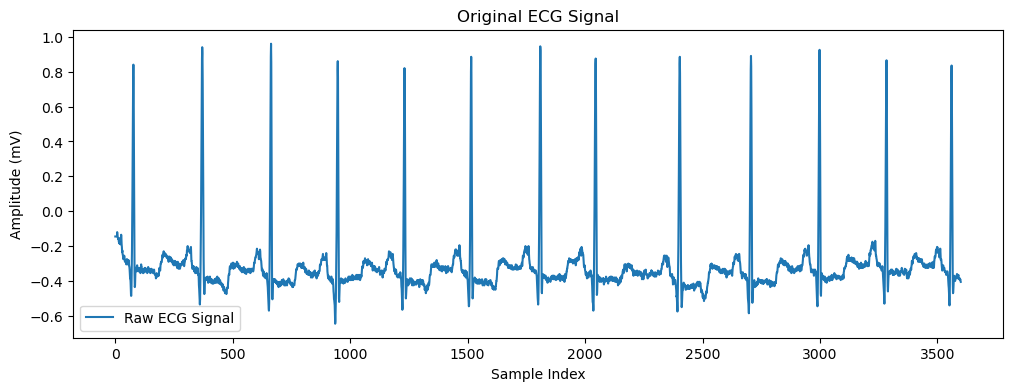

In [9]:
# Load one ECG signal from MIT-BIH dataset using wfdb (Example: Record 100)
record = wfdb.rdrecord('mitdb-test/100')
ecg_signal = record.p_signal[:, 0]  # Select Lead I

# Visualize the raw ECG signal (First 3600 samples)
plt.figure(figsize=(12, 4))
plt.plot(ecg_signal[:3600], label='Raw ECG Signal')
plt.xlabel("Sample Index")
plt.ylabel("Amplitude (mV)")
plt.title("Original ECG Signal")
plt.legend()
plt.show()

In [42]:
#Convert all files to CSV
folder_path = 'mitdb-test/'
output_folder = 'MITDB_CSV'

os.makedirs(output_folder, exist_ok = True)
records = [f for f in os.listdir(folder_path) if f.endswith(".dat")]
record_names = [os.path.splitext(f)[0] for f in records]

for record_name in record_names:
    try:
        print(f"Processing record: {record_name}")
        
        record = wfdb.rdrecord(f"{folder_path}{record_name}")
        annotation = wfdb.rdann(f"{folder_path}{record_name}", "atr")

        signals = record.p_signal
        lead_names = record.sig_name #("MLII", "V1" or others)
        ann_samples = annotation.sample  # Locations of beats (R-peaks)
        ann_labels = annotation.symbol  # Arrhythmia labels

        df_signals = pd.DataFrame(signals, columns = lead_names)
        df_signals["Label"] = pd.Series(dtype="object") #np.nan
        df_signals.loc[ann_samples, "Label"] = ann_labels

        output_path = os.path.join(output_folder, f"{record_name}_ecg.csv")
        df_signals.to_csv(output_path, index=False)
        print(f"Saved to {output_path}\n")
    
    except Exception as e:
        print(f"Failed to process {record_name}: {e}")    

Processing record: 100
Saved to MITDB_CSV\100_ecg.csv

Processing record: 101
Saved to MITDB_CSV\101_ecg.csv

Processing record: 102
Saved to MITDB_CSV\102_ecg.csv

Processing record: 103
Saved to MITDB_CSV\103_ecg.csv

Processing record: 104
Saved to MITDB_CSV\104_ecg.csv

Processing record: 105
Saved to MITDB_CSV\105_ecg.csv

Processing record: 106
Saved to MITDB_CSV\106_ecg.csv

Processing record: 107
Saved to MITDB_CSV\107_ecg.csv

Processing record: 108
Saved to MITDB_CSV\108_ecg.csv

Processing record: 109
Saved to MITDB_CSV\109_ecg.csv

Processing record: 111
Saved to MITDB_CSV\111_ecg.csv

Processing record: 112
Saved to MITDB_CSV\112_ecg.csv

Processing record: 113
Saved to MITDB_CSV\113_ecg.csv

Processing record: 114
Saved to MITDB_CSV\114_ecg.csv

Processing record: 115
Saved to MITDB_CSV\115_ecg.csv

Processing record: 116
Saved to MITDB_CSV\116_ecg.csv

Processing record: 117
Saved to MITDB_CSV\117_ecg.csv

Processing record: 118
Saved to MITDB_CSV\118_ecg.csv

Processing

In [1]:
#Test plot to see if CSV data was converted properly (Record 100)
df = pd.read_csv("MITDB_CSV/100_ecg.csv")

plt.figure(figsize=(12, 4))
plt.plot(df.index[:3600], df["MLII"][0:3600], label="MLII Lead")  # Plot first 3600 samples

# Add labels at beats (only where labels are present)
for i in range(3600):  
    label_index = 0 + i  # Calculate the actual index in the DataFrame
    if label_index < 3600 and pd.notna(df["Label"].iloc[label_index]):  
        plt.text(i, df["MLII"].iloc[label_index], df["Label"].iloc[label_index], fontsize=10, color='red')

plt.xlabel("Time (samples)")
plt.ylabel("ECG Signal (mV)")
plt.title("ECG Signal - Lead MLII")
plt.legend()
plt.show()

NameError: name 'pd' is not defined

In [58]:
#Map labels according to AAMI standards and concatenate all of them into a master dataset
label_mapping = {
    "N": "N", "L": "N", "R": "N", "e": "N", "j": "N",  # Grouping into "N"
    "a": "S", "S": "S", "A": "S", "J": "S",  # Grouping into "S"
    "V": "V", "E": "V",  # Grouping into "V"
    "F": "F",  # Grouping into "F"
    "U": "Q",  "P": "Q", "f": "Q"  # Grouping into "Q"
}

folder = 'MITDB_CSV'
all_df = []

for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder, filename)
        try:
            df = pd.read_csv(file_path)
            df["Grouped_Label"] = df["Label"].map(label_mapping)
            df.to_csv(file_path, index=False)

            df["File"] = filename
            all_df.append(df)
            print(f"Processed: {filename}, Rows: {df.shape[0]}")
        except Exception as e:
            print(f"Error reading {filename}: {e}")

master_df = pd.concat(all_df, ignore_index = True)
master_df.to_csv('Master_ECG_Data.csv',index = False)        
print(f"All files combined into Master_ECG_Data.csv with {master_df.shape[0]} rows and {master_df.shape[1]} columns.")

Processed: 100_ecg.csv, Rows: 650000
Processed: 101_ecg.csv, Rows: 650000
Processed: 102_ecg.csv, Rows: 650000
Processed: 103_ecg.csv, Rows: 650000
Processed: 104_ecg.csv, Rows: 650000
Processed: 105_ecg.csv, Rows: 650000
Processed: 106_ecg.csv, Rows: 650000
Processed: 107_ecg.csv, Rows: 650000
Processed: 108_ecg.csv, Rows: 650000
Processed: 109_ecg.csv, Rows: 650000
Processed: 111_ecg.csv, Rows: 650000
Processed: 112_ecg.csv, Rows: 650000
Processed: 113_ecg.csv, Rows: 650000
Processed: 114_ecg.csv, Rows: 650000
Processed: 115_ecg.csv, Rows: 650000
Processed: 116_ecg.csv, Rows: 650000
Processed: 117_ecg.csv, Rows: 650000
Processed: 118_ecg.csv, Rows: 650000
Processed: 119_ecg.csv, Rows: 650000
Processed: 121_ecg.csv, Rows: 650000
Processed: 122_ecg.csv, Rows: 650000
Processed: 123_ecg.csv, Rows: 650000
Processed: 124_ecg.csv, Rows: 650000
Processed: 200_ecg.csv, Rows: 650000
Processed: 201_ecg.csv, Rows: 650000
Processed: 202_ecg.csv, Rows: 650000
Processed: 203_ecg.csv, Rows: 650000
P

In [172]:
master_df

,MLII,V5,Label,Grouped_Label,File,V1,V2,V4
0,-0.145,-0.065,NaN,NaN,100_ecg.csv,NaN,NaN,NaN
1,-0.145,-0.065,NaN,NaN,100_ecg.csv,NaN,NaN,NaN
2,-0.145,-0.065,NaN,NaN,100_ecg.csv,NaN,NaN,NaN
3,-0.145,-0.065,NaN,NaN,100_ecg.csv,NaN,NaN,NaN
4,-0.145,-0.065,NaN,NaN,100_ecg.csv,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
31199995,-0.390,NaN,NaN,NaN,234_ecg.csv,0.070,NaN,NaN
31199996,-0.390,NaN,NaN,NaN,234_ecg.csv,0.070,NaN,NaN
31199997,-0.395,NaN,NaN,NaN,234_ecg.csv,0.075,NaN,NaN
31199998,-0.380,NaN,NaN,NaN,234_ecg.csv,0.080,NaN,NaN


Number of annotated beats:  102433
[nan 'N' 'S' 'V' 'Q' 'F']
Grouped_Label
N    90631
V     7236
S     2781
Q      982
F      803
Name: count, dtype: int64


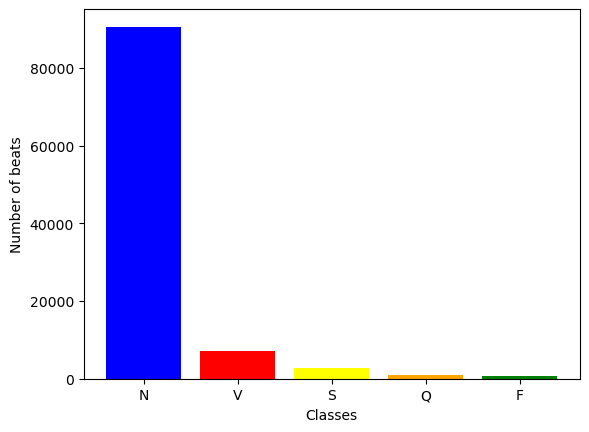

In [62]:
#Find number of annotations
beat_df = master_df.dropna(subset=['Grouped_Label'])
print('Number of annotated beats: ',beat_df.shape[0])

label_counts = master_df['Grouped_Label'].value_counts()
print(master_df['Grouped_Label'].unique())
print(label_counts)

plt.bar(label_counts.index, label_counts.values, color=['blue','red','yellow','orange','green'])
plt.xlabel('Classes')
plt.ylabel('Number of beats')
plt.show()

In [72]:
#Reshape the master dataset into individual beats
# Identify R-peak locations
r_peaks = master_df[master_df['Grouped_Label'].notna()].index.values  

# Adaptive segmentation
segments = []
labels = []

for i in range(1, len(r_peaks) - 1):  # Skip first and last peak
    prev_r = r_peaks[i - 1]  # Previous R-peak
    curr_r = r_peaks[i]      # Current R-peak
    next_r = r_peaks[i + 1]  # Next R-peak
    
    # Define adaptive window:
    start = prev_r + int(0.36 * (curr_r - prev_r))  # 36% of RR interval before R
    end = curr_r + int(0.64 * (next_r - curr_r))    # 64% of RR interval after R
    
    # Extract segment
    segment = master_df["MLII"].values[start:end]
    label = master_df["Grouped_Label"].iloc[curr_r]  # Use label at the R-peak

    # Normalize to fixed length 
    #if more than 360, downsamples
    #if less than 360, fills gap by interpolating between exsiting points to create sequence w 360
    segment = np.interp(np.linspace(0, 1, 360), np.linspace(0, 1, len(segment)), segment)
    
    segments.append(segment)
    labels.append(label)

# Convert to numpy array
X_adaptive = np.array(segments)
y_adaptive = np.array(labels)

print(f"Extracted {len(X_adaptive)} adaptive segments.")

Extracted 102431 adaptive segments.


In [76]:
df_A = pd.DataFrame(X_adaptive)
df_A['Label'] = y_adaptive  # Append labels

# Save processed data
df_A.to_csv("Individual_Beats.csv", index=False)

In [82]:
df_A

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,Label
0,-0.360,-0.360195,-0.365390,-0.368245,-0.351100,-0.329025,-0.325000,-0.327730,-0.336560,-0.331226,...,-0.327799,-0.327270,-0.333830,-0.339025,-0.352660,-0.337340,-0.330390,-0.330000,-0.335,N
1,-0.450,-0.444889,-0.439777,-0.435334,-0.437326,-0.408329,-0.391657,-0.369220,-0.364109,-0.361003,...,-0.371783,-0.361560,-0.364331,-0.360557,-0.364554,-0.378997,-0.370446,-0.365111,-0.350,N
2,-0.395,-0.394944,-0.389666,-0.374499,-0.359109,-0.339721,-0.334666,-0.330390,-0.335000,-0.333997,...,-0.330446,-0.334610,-0.339666,-0.335279,-0.320669,-0.339331,-0.340000,-0.349889,-0.365,N
3,-0.375,-0.349833,-0.334666,-0.319833,-0.315223,-0.320279,-0.324331,-0.313440,-0.294109,-0.286504,...,-0.330891,-0.320780,-0.315334,-0.324443,-0.334554,-0.354331,-0.345223,-0.340056,-0.335,N
4,-0.420,-0.410418,-0.424721,-0.418747,-0.402214,-0.378607,-0.369164,-0.365000,-0.365000,-0.359986,...,-0.325000,-0.329025,-0.334164,-0.330696,-0.325557,-0.325000,-0.320279,-0.324861,-0.330,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102426,-0.280,-0.275724,-0.267897,-0.259345,-0.255000,-0.256379,-0.261309,-0.269861,-0.274206,-0.278482,...,-0.219206,-0.214861,-0.206309,-0.205000,-0.202103,-0.195655,-0.190000,-0.190724,-0.195,N
102427,-0.260,-0.247089,-0.245000,-0.245000,-0.245000,-0.246518,-0.250000,-0.250125,-0.254429,-0.262465,...,-0.213287,-0.200376,-0.200000,-0.206964,-0.218357,-0.222911,-0.224178,-0.235000,-0.235,N
102428,-0.180,-0.193203,-0.198802,-0.203203,-0.205000,-0.209011,-0.215000,-0.215000,-0.215418,-0.224220,...,-0.250627,-0.258384,-0.260000,-0.254011,-0.250000,-0.248203,-0.243802,-0.241797,-0.255,N
102429,-0.255,-0.259415,-0.263830,-0.271490,-0.272340,-0.263774,-0.253510,-0.250000,-0.250320,-0.254735,...,-0.239039,-0.240000,-0.240000,-0.240000,-0.232981,-0.228510,-0.235000,-0.233830,-0.225,N


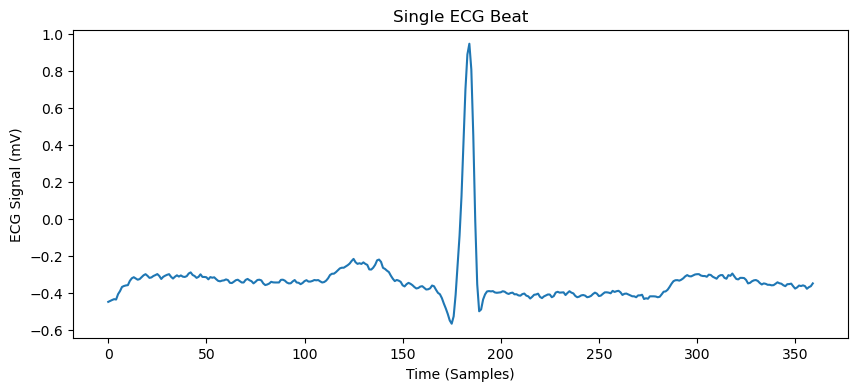

In [120]:
#Test plot of a random beat
plt.figure(figsize=(10, 4))
plt.plot(df_A.iloc[1,:-1])
plt.xlabel("Time (Samples)")
plt.ylabel("ECG Signal (mV)")
plt.title("Single ECG Beat")
plt.show()

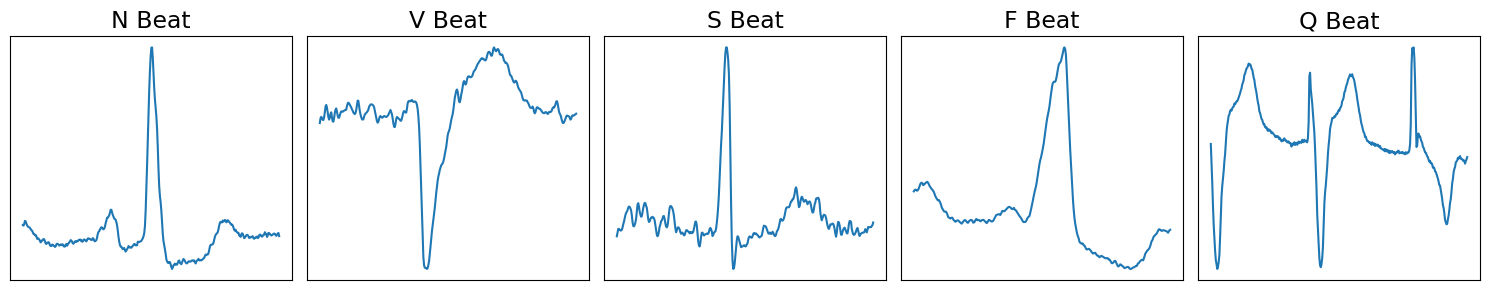

In [118]:
#Plot each of the 5 beat types
import matplotlib.pyplot as plt
import numpy as np

beat_types = ['N', 'V', 'S', 'F', 'Q']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

for col_idx, beat_type in enumerate(beat_types):
    # Select one random beat type
    beat = df_A[df_A["Label"] == beat_type].sample(1, random_state=30).iloc[:, :-1].values[0]
    
    # Plot the beat
    axes[col_idx].plot(beat)
    axes[col_idx].set_title(f"{beat_type} Beat", fontsize=17)
    axes[col_idx].set_xticks([])
    axes[col_idx].set_yticks([])
    
plt.tight_layout()
plt.show()


In [122]:
#Undersample the 'N' beats
N_beats = df_A[df_A['Label'] == 'N']
V_beats = df_A[df_A['Label'] == 'V']
S_beats = df_A[df_A['Label'] == 'S']
Q_beats = df_A[df_A['Label'] == 'Q']
F_beats = df_A[df_A['Label'] == 'F']

# Undersample the majority class 'N' to match 'V' (7236 samples)
N_beats_undersampled = resample(N_beats, 
                                replace=False,  
                                n_samples=7236,  
                                random_state=42)

# Combine all classes
balanced_N_data = pd.concat([N_beats_undersampled, V_beats, S_beats, Q_beats, F_beats])

# Shuffle dataset
balanced_N_data = balanced_N_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution
print("Class distribution after undersampling:")
print(balanced_N_data['Label'].value_counts())

Class distribution after undersampling:
Label
V    7236
N    7236
S    2781
Q     982
F     803
Name: count, dtype: int64


In [140]:
#Oversample the 'S,F,Q' beats
# Separate features (360 columns) and labels (last column)
X = balanced_N_data.iloc[:, :-1]  # Features
X = X.fillna(0)
y = balanced_N_data.iloc[:, -1]   # Labels ('N', 'V', 'S', 'Q', 'F')

# Define SMOTE strategy for only the minority classes
strategy = {'S': 7236, 'Q': 7236, 'F': 7236}  

# Apply SMOTE
smote = SMOTE(sampling_strategy=strategy, random_state=42) 
X_res, y_res = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_res.value_counts())

# Save the resampled data
resampled_df = pd.DataFrame(X_res, columns=balanced_N_data.columns[:-1])  
resampled_df['Label'] = y_res  # Add label column back
resampled_df.to_csv('Dataset A.csv', index=False)

Class distribution after SMOTE:
Label
V    7236
F    7236
S    7236
N    7236
Q    7236
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_32552\2227749590.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_df['Label'] = y_res  # Add label column back


In [146]:
resampled_df

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,Label
0,-0.290000,-0.301323,-0.305000,-0.305000,-0.304415,-0.281769,-0.272354,-0.271421,-0.275390,-0.282939,...,-0.264610,-0.272159,-0.267939,-0.257744,-0.250195,-0.246323,-0.254805,-0.267451,-0.275000,V
1,-0.085000,-0.049763,-0.016574,0.015710,0.050947,0.075710,0.099136,0.127326,0.142758,0.161992,...,-0.593189,-0.591671,-0.609290,-0.617382,-0.620000,-0.620000,-0.617047,-0.613524,-0.610000,F
2,-1.105000,-1.187981,-1.220320,-1.225000,-1.197479,-1.133148,-1.070738,-1.006407,-0.933677,-0.864666,...,-0.807437,-0.843649,-0.871379,-0.884150,-0.865641,-0.837981,-0.812660,-0.798440,-0.780000,S
3,-0.635000,-0.638969,-0.640000,-0.649540,-0.665000,-0.665000,-0.672632,-0.686142,-0.700265,-0.714345,...,-0.931490,-0.941643,-0.948816,-0.945153,-0.949123,-0.953092,-0.963245,-0.977061,-0.985000,N
4,-0.005000,-0.010167,-0.016337,-0.035501,-0.039331,-0.033329,-0.025000,-0.028510,-0.040000,-0.040000,...,-0.543663,-0.541170,-0.520014,-0.523329,-0.520669,-0.533496,-0.544331,-0.535334,-0.535000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36175,-0.079903,-0.062695,-0.061000,-0.060108,-0.061364,-0.050746,-0.042907,-0.031825,-0.031650,-0.028356,...,-0.370832,-0.374337,-0.360132,-0.338431,-0.346395,-0.361059,-0.363464,-0.373066,-0.368029,S
36176,0.030689,0.057104,0.087754,0.096074,0.088168,0.069077,0.036899,0.002406,-0.046811,-0.102094,...,-0.219160,-0.231571,-0.230372,-0.209848,-0.223948,-0.240160,-0.223663,-0.210594,-0.226138,S
36177,0.182875,0.187528,0.183631,0.193358,0.195346,0.197453,0.197457,0.201692,0.199170,0.196049,...,-0.150661,-0.150476,-0.152774,-0.149342,-0.139546,-0.137969,-0.139889,-0.139796,-0.142240,S
36178,-0.019640,-0.024044,-0.000877,0.009950,0.028147,0.035236,0.055796,0.068417,0.081655,0.095830,...,-0.272788,-0.265508,-0.265396,-0.266045,-0.268615,-0.260299,-0.265297,-0.274802,-0.284550,S


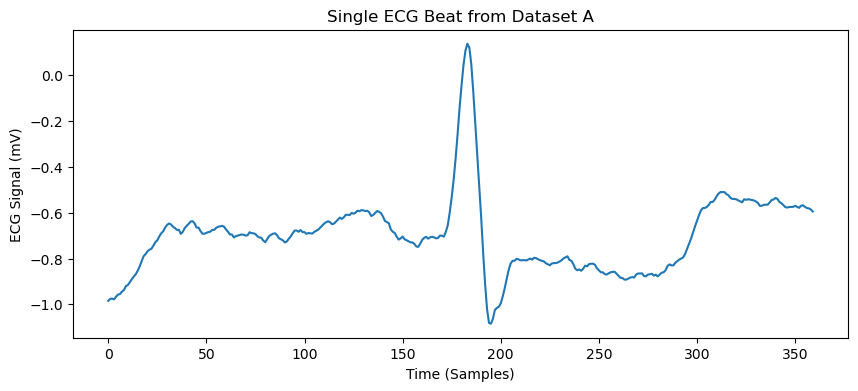

In [51]:
#Check for beat shapes randomly
plt.figure(figsize=(10, 4))
y = resampled_df.iloc[30,:-1]
x = np.arange(len(y))

plt.plot(x,y)
plt.xlabel("Time (Samples)")
plt.ylabel("ECG Signal (mV)")
plt.title("Single ECG Beat from Dataset A")
plt.show()

PREPARATION OF DATASET B - 5-BEAT WINDOWS

In [19]:
r_peaks = master_df[master_df['Grouped_Label'].notna()].index.values

normal_class = "N"
abnormal_classes = ["S", "V", "F", "Q"]  # Abnormal beats

segments_2 = []
labels_2 = []
num_beats_per_window = 5

for i in range(1, len(r_peaks) - num_beats_per_window, num_beats_per_window):
    prev_r = r_peaks[i-1]
    curr_r = r_peaks[i]
    next_r = r_peaks[i + num_beats_per_window - 1]
    next_r_after = r_peaks[i + num_beats_per_window]

    start = prev_r + int(0.36 * (curr_r - prev_r))  # 36% of RR interval before R
    end = next_r + int(0.64 * (next_r_after - next_r))    # 64% of RR interval after R

    segment = master_df['MLII'].values[start:end] 
    labels_in_window = master_df['Grouped_Label'].iloc[r_peaks[i:i + num_beats_per_window]].values
    beat_counts = Counter(labels_in_window)

    #Labelling rule for multiple beats in window
    if len(beat_counts.keys()) == 1 and normal_class in beat_counts:
        segment_label = normal_class
    else:
        abnormal_labels = [label for label in beat_counts if label in abnormal_classes]

        if len(abnormal_labels) == 0:
            segment_label = normal_class
        elif len(abnormal_labels) == 1:
            segment_label = abnormal_labels[0]
        else:
            most_frequent_abnormal = max(abnormal_labels, key=lambda x: beat_counts[x])
            tied_classes = [label for label in abnormal_labels if beat_counts[label] == beat_counts[most_frequent_abnormal]]
            
            if len(tied_classes) > 1:
                for label in labels_in_window:
                    if label in tied_classes:
                        segment_label = label
                        break
            else:
                segment_label = most_frequent_abnormal

    segment = np.interp(np.linspace(0, 1, 1800), np.linspace(0, 1, len(segment)), segment)
    
    segments_2.append(segment)
    labels_2.append(segment_label)

X_adaptive_2 = np.array(segments_2)
y_adaptive_2 = np.array(labels_2)

print(f"Extracted {len(X_adaptive_2)} adaptive segments (each containing {num_beats_per_window} beats).")

Extracted 20486 adaptive segments (each containing 5 beats).


In [21]:
#Identify beat distribution
my_counter = Counter(y_adaptive_2)
print(my_counter)

Counter({'N': 14583, 'V': 4127, 'S': 1128, 'F': 389, 'Q': 259})


In [23]:
df_B = pd.DataFrame(X_adaptive_2)
df_B['Label'] = y_adaptive_2  # Append labels

# Save processed data
df_B.to_csv("5-Beat_Windows.csv", index=False)

In [25]:
#Undersample the 'N' beats
N_beats = df_B[df_B['Label'] == 'N']
V_beats = df_B[df_B['Label'] == 'V']
S_beats = df_B[df_B['Label'] == 'S']
Q_beats = df_B[df_B['Label'] == 'Q']
F_beats = df_B[df_B['Label'] == 'F']

# Undersample the majority class 'N' to match 'V' (4127 samples)
N_beats_undersampled = resample(N_beats, 
                                replace=False,  
                                n_samples=4127,  
                                random_state=42)

# Combine all classes
balanced_N_data = pd.concat([N_beats_undersampled, V_beats, S_beats, Q_beats, F_beats])

# Shuffle dataset
balanced_N_data = balanced_N_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution
print("Class distribution after undersampling:")
print(balanced_N_data['Label'].value_counts())

Class distribution after undersampling:
Label
N    4127
V    4127
S    1128
F     389
Q     259
Name: count, dtype: int64


In [27]:
#Oversample the 'S,F,Q' beats
# Separate features (1800 columns) and labels (last column)
X = balanced_N_data.iloc[:, :-1]  # Features
X = X.fillna(0)
y = balanced_N_data.iloc[:, -1]   # Labels ('N', 'V', 'S', 'Q', 'F')

# Define SMOTE strategy for only the minority classes
strategy = {'S': 4127, 'Q': 4127, 'F': 4127}  

# Apply SMOTE
smote = SMOTE(sampling_strategy=strategy, random_state=42) 
X_res, y_res = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_res.value_counts())

# Save the resampled data
resampled_df_2 = pd.DataFrame(X_res, columns=balanced_N_data.columns[:-1])  
resampled_df_2['Label'] = y_res  # Add label column back
resampled_df_2.to_csv('Dataset B.csv', index=False)

Class distribution after SMOTE:
Label
N    4127
S    4127
V    4127
F    4127
Q    4127
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_28688\2573387945.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_df_2['Label'] = y_res  # Add label column back


In [28]:
resampled_df_2

,0,1,2,3,4,5,6,7,8,9,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,Label
0,0.000000,-0.027949,-0.055898,-0.083847,-0.115428,-0.134872,-0.145898,-0.160428,-0.174530,-0.187693,...,-0.272735,-0.275000,-0.275000,-0.280128,-0.284530,-0.271026,-0.275000,-0.275342,-0.280000,N
1,-0.075000,-0.072287,-0.053644,-0.045931,-0.042713,-0.051782,-0.067207,-0.084241,-0.084575,-0.076690,...,-0.119150,-0.130759,-0.144069,-0.141609,-0.138138,-0.127034,-0.121356,-0.120000,-0.135000,S
2,-0.820000,-0.816812,-0.812248,-0.805873,-0.802248,-0.801879,-0.808255,-0.810000,-0.811006,-0.817382,...,-0.265000,-0.256946,-0.253491,-0.266242,-0.270000,-0.271309,-0.280873,-0.288624,-0.295000,V
3,0.035000,0.042893,0.056929,0.068680,0.075000,0.094288,0.110000,0.115253,0.127715,0.126320,...,-0.282285,-0.278502,-0.270787,-0.270000,-0.270000,-0.263680,-0.255000,-0.263071,-0.265000,S
4,-0.310000,-0.313863,-0.325906,-0.336590,-0.340000,-0.340000,-0.336820,-0.322743,-0.305000,-0.305000,...,-0.190906,-0.184086,-0.181820,-0.185000,-0.185000,-0.202051,-0.221367,-0.236137,-0.240000,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20630,-0.005382,-0.000361,-0.000318,-0.001880,0.009986,0.021725,0.036079,0.033812,0.022121,0.005346,...,-0.302328,-0.300440,-0.295073,-0.303019,-0.308599,-0.313229,-0.305019,-0.302204,-0.285045,S
20631,0.010704,0.014345,0.010120,0.001290,-0.007345,-0.011750,-0.012358,-0.010729,-0.007322,0.000361,...,-0.173342,-0.174075,-0.173802,-0.173729,-0.179811,-0.182776,-0.188970,-0.200194,-0.207486,S
20632,0.029899,0.032533,0.046830,0.053695,0.061880,0.067876,0.073737,0.082986,0.088687,0.087935,...,-0.164682,-0.164780,-0.168206,-0.168573,-0.175680,-0.182027,-0.187626,-0.185533,-0.173940,S
20633,-0.164792,-0.166980,-0.174076,-0.176286,-0.170038,-0.167065,-0.166076,-0.157793,-0.144814,-0.131643,...,-0.364113,-0.367419,-0.368419,-0.366891,-0.370799,-0.370496,-0.363742,-0.354205,-0.348576,S


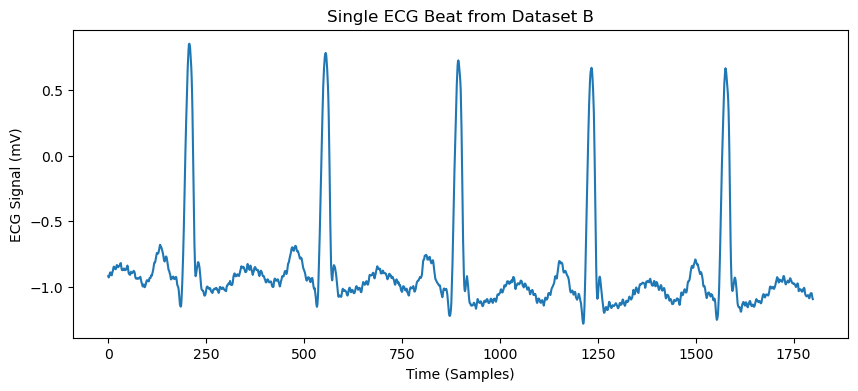

In [29]:
#Check for beat shapes randomly
plt.figure(figsize=(10, 4))
plt.plot(resampled_df_2.iloc[100,:-1])
plt.xlabel("Time (Samples)")
plt.ylabel("ECG Signal (mV)")
plt.title("Single ECG Beat from Dataset B")
plt.show()

In [75]:
#Extract 5-second segments
sampling_rate= 360
window_size = 5 * sampling_rate
stride = window_size

X_windows = []
y_windows = []

normal_class = "N"
abnormal_classes = ["S", "V", "F", "Q"]  # Abnormal beats

for start in range(0, len(master_df) - window_size, stride):
    end = start + window_size
    segment = master_df["MLII"].values[start:end]  # Extract 5s segment
    
    labels_in_window = master_df["Grouped_Label"].iloc[start:end].values

    beat_counts = Counter(labels_in_window)
    
    if len(beat_counts.keys()) == 1 and normal_class in beat_counts:
        segment_label = normal_class
    else:
        abnormal_labels = [label for label in beat_counts if label in abnormal_classes]
        
        if len(abnormal_labels) == 0:
            segment_label = normal_class
        elif len(abnormal_labels) == 1:
            segment_label = abnormal_labels[0]
        else:
            most_frequent_abnormal = max(abnormal_labels, key=lambda x: beat_counts[x])
            
            tied_classes = [label for label in abnormal_labels if beat_counts[label] == beat_counts[most_frequent_abnormal]]
            if len(tied_classes) > 1:
                for label in labels_in_window:
                    if label in tied_classes:
                        segment_label = label
                        break
            else:
                segment_label = most_frequent_abnormal
            

    # Store the segment and its label
    X_windows.append(segment)
    y_windows.append(segment_label)

# Convert to numpy arrays
X_windows = np.array(X_windows)
y_windows = np.array(y_windows)

print(f"Extracted {len(X_windows)} windows of size {window_size}.")

segment_counts = Counter(y_windows)
print(f"Segment counts per class: {segment_counts}")

Extracted 17333 windows of size 1800.
Segment counts per class: Counter({'N': 12209, 'V': 3461, 'S': 1004, 'Q': 422, 'F': 237})


In [77]:
#Calculate stride of each class
class_counts = Counter(y_windows)
max_class_count = max(class_counts.values())

class_strides = {}
for class_label, count in segment_counts.items():
    overlap_len = round(window_size * (1 - (count / max_class_count)))
    stride_len = window_size - overlap_len  # New stride
    class_strides[class_label] = max(stride_len, 1)  # Ensure stride is at least 1 sample

print("Class Stride Lengths:", class_strides)

Class Stride Lengths: {'N': 1800, 'S': 148, 'V': 510, 'Q': 62, 'F': 35}


In [99]:
#Implement overlapping segmentation
#Get new beat counts from new strides
class_strides = {'N': 1800, 'S': 148, 'V': 510, 'Q': 62, 'F': 35}

X_adjusted = []
y_adjusted = []

start = 0
while start + window_size <= len(master_df):
    end = start + window_size
    segment = master_df["MLII"].values[start:end]  # Extract 5s segment
    
    # Extract all labels in the window
    labels_in_window = master_df["Grouped_Label"].iloc[start:end].values

    beat_counts = Counter(labels_in_window)
    
    if len(beat_counts.keys()) == 1 and 'N' in beat_counts:
        segment_label = 'N'
    else:
        abnormal_labels = [label for label in beat_counts if label in class_strides.keys() and label != 'N']
        
        if len(abnormal_labels) == 0:
            segment_label = 'N'
        elif len(abnormal_labels) == 1:
            segment_label = abnormal_labels[0]
        else:
            most_frequent_abnormal = max(abnormal_labels, key=lambda x: beat_counts[x])
            
            tied_classes = [label for label in abnormal_labels if beat_counts[label] == beat_counts[most_frequent_abnormal]]
            if len(tied_classes) > 1:
                for label in labels_in_window:
                    if label in tied_classes:
                        segment_label = label
                        break
            else:
                segment_label = most_frequent_abnormal
            

    # Store the segment and its label
    X_adjusted.append(segment)
    y_adjusted.append(segment_label)
    
    stride = class_strides.get(segment_label, 1800)
    start += stride

# Convert to numpy arrays
X_adjusted = np.array(X_adjusted)
y_adjusted = np.array(y_adjusted)

segment_adjusted = Counter(y_adjusted)
print(f"Segment counts per class: {segment_adjusted}")

Segment counts per class: Counter({'N': 13075, 'V': 10862, 'S': 9190, 'F': 8495, 'Q': 7546})


In [81]:
df_C = pd.DataFrame(X_adjusted)
df_C['Label'] = y_adjusted  



In [101]:
print("Any NaNs:", df_C.isna().values.any())
print("Any Infs:", np.isinf(df_C.iloc[:, :-1].values).any())


Any NaNs: True
Any Infs: False


In [103]:
df_C.iloc[:, :-1] = df_C.iloc[:, :-1].fillna(0)
df_C.iloc[:, :-1] = df_C.iloc[:, :-1].replace([np.inf, -np.inf], 0)


In [105]:
# Save processed data
df_C.to_csv("Dataset C.csv", index=False)

In [106]:
df_C

,0,1,2,3,4,5,6,7,8,9,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,Label
0,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.120,-0.135,...,-0.345,-0.355,-0.365,-0.370,-0.405,-0.445,-0.480,-0.495,-0.520,N
1,-0.535,-0.505,-0.415,-0.280,-0.135,0.065,0.300,0.580,0.810,0.945,...,-0.385,-0.390,-0.390,-0.385,-0.385,-0.395,-0.390,-0.400,-0.405,S
2,-0.300,-0.295,-0.285,-0.280,-0.285,-0.285,-0.295,-0.285,-0.280,-0.275,...,-0.320,-0.310,-0.330,-0.330,-0.325,-0.310,-0.305,-0.305,-0.320,S
3,-0.395,-0.410,-0.415,-0.405,-0.385,-0.385,-0.380,-0.400,-0.400,-0.395,...,-0.370,-0.375,-0.365,-0.370,-0.380,-0.375,-0.365,-0.360,-0.360,N
4,-0.355,-0.355,-0.370,-0.365,-0.355,-0.350,-0.350,-0.350,-0.360,-0.360,...,-0.410,-0.400,-0.405,-0.390,-0.390,-0.400,-0.390,-0.390,-0.390,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49163,-0.245,-0.240,-0.240,-0.245,-0.255,-0.260,-0.280,-0.265,-0.245,-0.235,...,-0.095,-0.120,-0.135,-0.165,-0.160,-0.180,-0.195,-0.210,-0.220,N
49164,-0.230,-0.235,-0.270,-0.295,-0.295,-0.285,-0.290,-0.290,-0.290,-0.275,...,-0.445,-0.450,-0.455,-0.465,-0.445,-0.430,-0.405,-0.410,-0.395,N
49165,-0.410,-0.400,-0.390,-0.395,-0.400,-0.405,-0.405,-0.390,-0.375,-0.360,...,-0.300,-0.310,-0.315,-0.310,-0.290,-0.295,-0.290,-0.285,-0.300,N
49166,-0.300,-0.290,-0.300,-0.300,-0.295,-0.285,-0.275,-0.245,-0.245,-0.230,...,-0.400,-0.415,-0.405,-0.410,-0.400,-0.410,-0.410,-0.405,-0.395,N


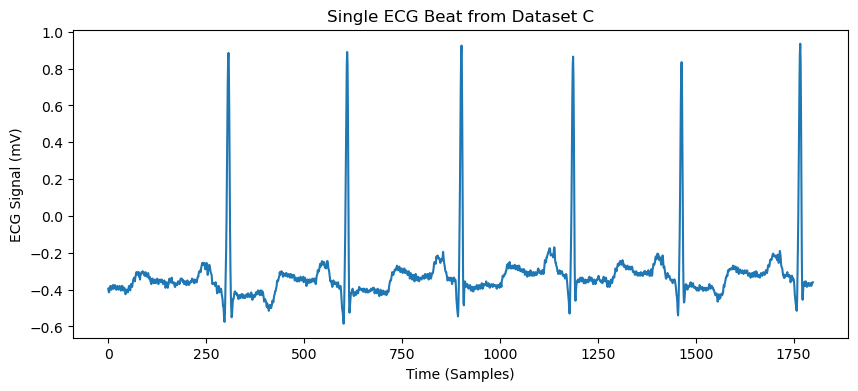

In [109]:
#Check for beat shapes randomly
plt.figure(figsize=(10, 4))
y = df_C.iloc[3, :-1].values
x = np.arange(len(y))

plt.plot(x,y)
plt.xlabel("Time (Samples)")
plt.ylabel("ECG Signal (mV)")
plt.title("Single ECG Beat from Dataset C")
plt.show()

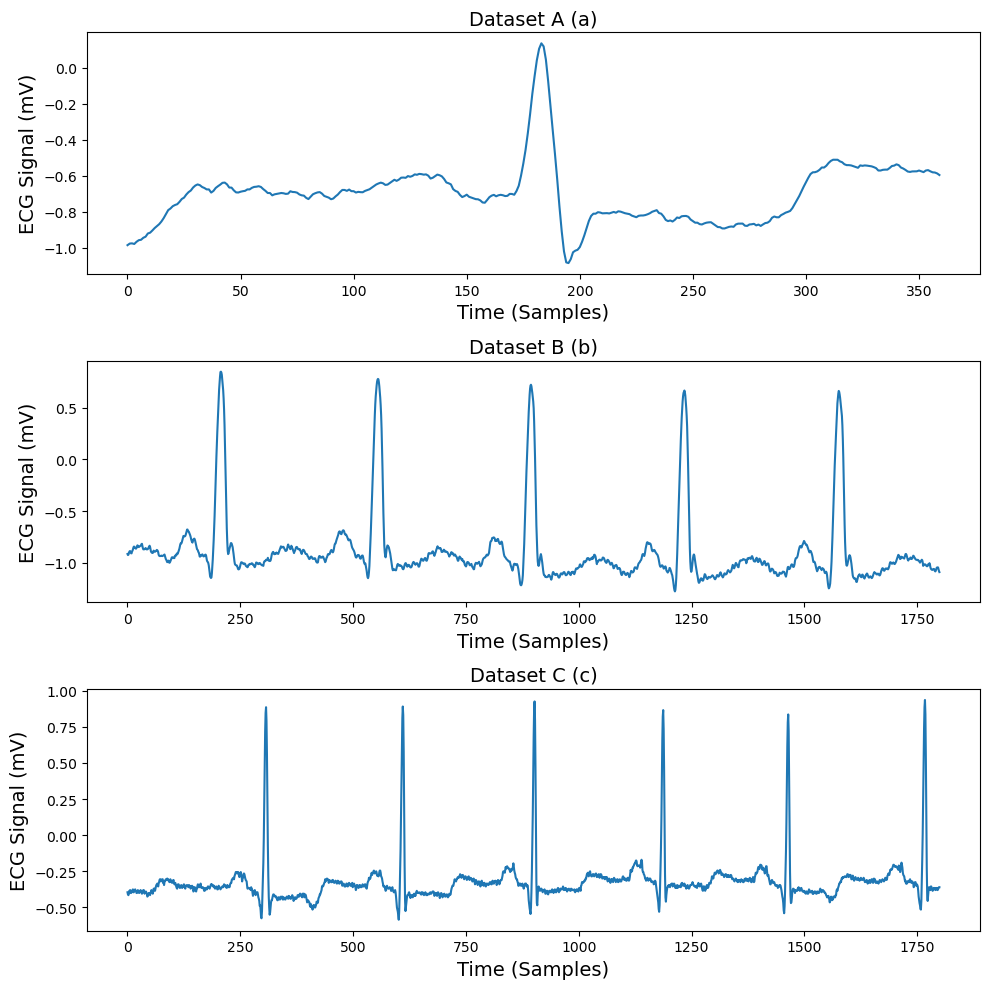

In [73]:
#Show all dataset segments
fig, axes = plt.subplots(3, 1, figsize=(10, 10))  

y = resampled_df.iloc[30, :-1].values
x = np.arange(len(y))
axes[0].plot(x,y)
axes[0].set_xlabel("Time (Samples)", fontsize=14)
axes[0].set_ylabel("ECG Signal (mV)", fontsize=14)
axes[0].set_title('Dataset A (a)', fontsize=14)

axes[1].plot(resampled_df_2.iloc[100,:-1]) 
axes[1].set_xlabel("Time (Samples)", fontsize=14)
axes[1].set_ylabel("ECG Signal (mV)", fontsize=14)
axes[1].set_title('Dataset B (b)', fontsize=14)

y2 = df_C.iloc[3,:-1].values
x2 = np.arange(len(y2))
axes[2].plot(x2,y2)  
axes[2].set_xlabel("Time (Samples)", fontsize=14)
axes[2].set_ylabel("ECG Signal (mV)", fontsize=14)
axes[2].set_title('Dataset C (c)', fontsize=14)

# Tight layout to avoid overlapping
plt.tight_layout()
plt.show()